In [1]:
import sys
import os
src_dir = os.path.abspath(os.path.join( os.pardir, 'src'))
sys.path.append(src_dir)

In [2]:
# from setup_plots import *

ModuleNotFoundError: No module named 'setup_plots'

In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pickle.load( open( "../data/average_suvival_time_data.pkl", "rb" ) )
data=data.dropna().reset_index(drop=True)

In [5]:
def winm(x, y, nw):
    xw = []
    yw = []
    step = (max(x) - min(x)) / nw
    lw = [min(x) + step * i for i in range(0, nw)]
    for i in range(0, len(lw) - 1):
        if len(y[x > lw[i]][x[x > lw[i]] < lw[i + 1]]) > 0:
            xw.append(np.mean(x[x > lw[i]][x[x > lw[i]] < lw[i + 1]]))
            yw.append(np.mean(y[x > lw[i]][x[x > lw[i]] < lw[i + 1]]))
    return (xw, yw)

In [6]:
data['edge']=data['edge'].astype(str)
data['source']=data['edge'].str.split(',').str[0].str.strip('(').str.strip("''")
data['target']=data['edge'].str.split(',').str[1].str.strip(')').str.strip("''")

In [7]:
data['source_state']=data['source'].str.split('_').str[-1]
data['target_state']=data['target'].str.split('_').str[-1]

In [8]:
def gravitation(data):
    return data['population_i']*data['population_j']/np.exp(data['distance']/np.average(data['distance']))

def radiation(data):
    results=[]
    for i in range(0,len(data)):
        m=data['population_i'].iloc[i]
        n=data['population_j'].iloc[i]
        d=data['distance'].iloc[i]
        df=data[(data.source==data['source'].iloc[i])&(data['distance']<=d)]
        p=df['population_j'].sum()#+np.array(df['population_i'])[0]
        results.append((m*n)/((m+p)*(m+n+p)))
    return np.array(results)/np.sum(results)

In [9]:
y=data['average_suvival_time']
x1=gravitation(data)
x2=radiation(data)

In [10]:
np.corrcoef(np.array(x1),np.array(y))[0][1],np.corrcoef(np.array(x2),np.array(y))[0][1]

(0.2769651506796195, -0.11456719794178347)

Text(0, 0.5, 'Average survival time (year)')

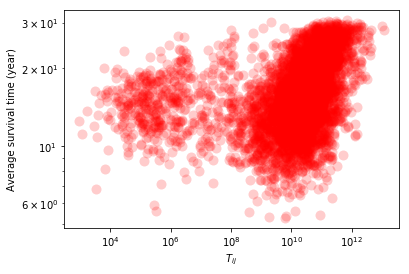

In [14]:
f, ax = plt.subplots(nrows=1, ncols=1)#, figsize=stdfigsize(nx=1, ny=1, scale=1))

# ax.plot(np.array(x1),np.array(y),'o',
#         color='b',
#         alpha=0.6,
#         markersize=10,
#         markeredgewidth=0, 
#         markeredgecolor='k',
#         rasterized=True,zorder=1)

ax.plot(np.array(x1),np.array(y),'o',
        color='r',
        alpha=0.2,
        markersize=10,
        markeredgewidth=0, 
        markeredgecolor='k',
        rasterized=True,zorder=1)
ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlabel(r'$T_{ij}$')
ax.set_ylabel(r'Average survival time (year)')

Text(0, 0.5, '$\\log [$ Avg. survival time $]$ (year)')

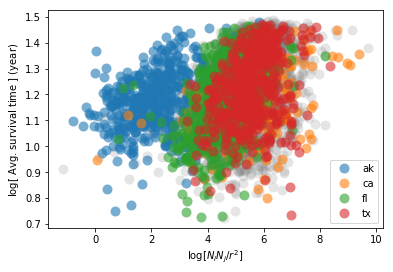

In [18]:
f, ax = plt.subplots(nrows=1, ncols=1)#, figsize=stdfigsize(nx=1, ny=1, scale=1))
for state in np.unique(data['source_state']):
    df=data[data['source_state']==state]
    y=df['average_suvival_time']
    x=df['population_i']*df['population_j']/df['distance']**2
    if len(x)>300:
        ax.plot(np.log10(x),np.log10(y),'o',
                alpha=0.6,
                markersize=10,
                markeredgewidth=0, 
                markeredgecolor='k',
                rasterized=True,zorder=1,label=state)
    else:
        ax.plot(np.log10(x),np.log10(y),'o',
                alpha=0.2,
                color='gray',
                markersize=10,
                markeredgewidth=0, 
                markeredgecolor='k',
                rasterized=True,zorder=-10,label='')        
ax.legend()

ax.set_xlabel(r'$\log [N_i N_j / r^2]$')
ax.set_ylabel(r'$\log [$ Avg. survival time $]$ (year)')

Text(0, 0.5, '$\\log [$ Avg. survival time $]$ (year)')

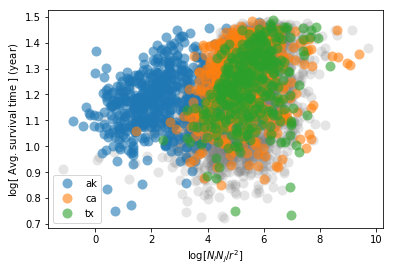

In [17]:
f, ax = plt.subplots(nrows=1, ncols=1)#, figsize=stdfigsize(nx=1, ny=1, scale=1))
for state in np.unique(data['target_state']):
    df=data[data['target_state']==state]
    y=df['average_suvival_time']
    x=df['population_i']*df['population_j']/df['distance']**2
    if len(x)>300:
        ax.plot(np.log10(x),np.log10(y),'o',
                alpha=0.6,
                markersize=10,
                markeredgewidth=0, 
                markeredgecolor='k',
                rasterized=True,zorder=1,label=state)
    else:
        ax.plot(np.log10(x),np.log10(y),'o',
                alpha=0.2,
                color='gray',
                markersize=10,
                markeredgewidth=0, 
                markeredgecolor='k',
                rasterized=True,zorder=-10,label='')        
ax.legend()

ax.set_xlabel(r'$\log [N_i N_j / r^2]$')
ax.set_ylabel(r'$\log [$ Avg. survival time $]$ (year)')

'WY'